In [1]:
import boto3
from boto.s3.connection import S3Connection
import boto
from boto.s3.key import Key
import sys
import os
import json
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import ast 

# %matplotlib inline
sys.path.insert(0,os.path.abspath('..'))

from utils.credentials import access_key, secret_access_key

In [2]:
client = boto3.client('s3')

conn = boto.s3.connect_to_region('us-east-2',
       aws_access_key_id=access_key,
       aws_secret_access_key=secret_access_key,
       is_secure=True,
       calling_format = boto.s3.connection.OrdinaryCallingFormat(),
       )

bucket = conn.get_bucket('persproj')

In [3]:
%%time
food_review_chunks = pd.read_csv('s3://persproj/data/food_review_df.csv', chunksize=1000, iterator=True)
# review_chunks = pd.read_csv('s3://persproj/data/review_df.csv', chunksize=1000, iterator=True)

CPU times: user 161 ms, sys: 83.4 ms, total: 244 ms
Wall time: 2.22 s


In [ ]:
%%time
food_review_df = pd.concat(food_review_chunks, ignore_index=True)
# food_review_chunks.get_chunk(100000)
# pd.concat(food_review_chunks[:100], ignore_index=True)

In [ ]:
print('Number of businesses:', len(food_review_df.business_id.unique()))

In [15]:
food_review_df.groupby('business_id').agg({'review_id': len}).sort_values('review_id', ascending=False).head(20)

,review_id
business_id,
ujHiaprwCQ5ewziu0Vi9rw,4318
Wxxvi3LZbHNIDwJ-ZimtnA,3579
_j2EtQtgLuXGRBfbM5YwZA,1117
6nKR80xEGHYf2UxAe_Cu_g,991
WRQ-9LluyivReFiQZFUujw,899
sMzNLdhJZGzYirIWt-fMAg,771
c_iQzwsTDYraPvHSKz88QA,770
qQCsLGMncJp1xWUGnOKCQA,723
Vs7gc9EE3k9wARuUcN9piA,708


In [18]:
food_review_df[food_review_df['business_id'] == 'ujHiaprwCQ5ewziu0Vi9rw']

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,state,cool,date,funny,review_id,review_stars,text,useful,user_id,len
43702,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2013-12-07 00:14:06,0.0,f0B9-r14-bLudyu5S7aLhw,1.0,We had dinner at the Bellagio Buffet last nigh...,1.0,SvMGr_Oih7ivtzmnCL-Tmg,791
43703,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2015-12-05 03:28:19,0.0,A4G1-LTupScgaPmXF1OPMg,4.0,Around $45 for a dinner on a Friday night.\nSn...,0.0,W2WICriV5Zf03S4ETzEsiQ,319
43704,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2017-02-09 04:48:06,0.0,aYSR8tO4kBqk0f6_ZYM2Zw,2.0,Went for Saturday Brunch. Wait was doable comp...,0.0,3BBiuiNLFuA-0Z4RE2UoQA,301
43705,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,1,2010-07-07 16:03:41,1.0,gCLbUG4PnhwhBKR_5jARjw,2.0,Having dined at many other Vegas buffets (the ...,4.0,7zphSXBrxDGChNlNkoGSng,666
43706,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2012-03-01 00:06:39,0.0,kkkfYUver5sndu-9ZQymRQ,5.0,Still the best dinner buffet on the strip. Sta...,0.0,XBkAAhQcrXQZ6fQsEp_KDQ,186
43707,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,1,2012-05-28 16:52:50,0.0,Slq7ppnKQjwR-6LSYLNuzg,3.0,I remember coming to the Buffet at the Bellagi...,2.0,j1MjZ7f1DkYnsGNZ9gTK5w,1715
43708,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2009-08-03 19:57:15,0.0,vxsyCM7tsBIf1pAYH1Erlw,4.0,I had lunch at the buffet and it was by far th...,0.0,WJYs12ng86_q70n4CkdkTA,412
43709,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2012-05-28 16:17:01,0.0,nu_RqAsOU87pBxyfsUFS3w,5.0,This place gives buffets a good name. The food...,0.0,DeVGAiOf2mHVUDfxvuhVlQ,270
43710,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2009-05-19 18:53:54,0.0,DMZyusUnf4LccJ2TkaSWYw,3.0,Saturday night buffet around 9PM.\n\nAt 9PM th...,1.0,MuhUC0v3qBBTj6D2DO0H_w,865
43711,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.11322,-115.17689,The Buffet at Bellagio,...,NV,0,2016-03-17 15:00:20,0.0,AJQw5KfrZTL6m7Ks8A9vRA,3.0,I

In [13]:
food_review_df['len'] = food_review_df['text'].apply(lambda x: len(x),1)

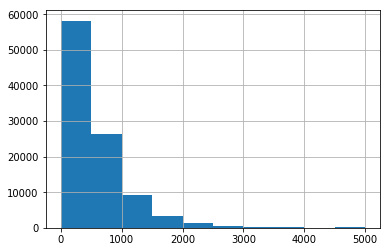

In [14]:
food_review_df['len'].hist()

Some buisnesses and tons of reviews

### filter out only restaurant reviews

In [220]:
food_df = (business_df[
    (business_df['categories'].str.contains('Food',na=False)) |
     (business_df['categories'].str.contains('Restaurant',na=False))|
     (business_df['categories'].str.contains('Bar',na=False))
])

In [221]:
%%time
food_review_df = food_df.merge(review_df, how='inner', left_on='business_id', right_on='business_id')

CPU times: user 55 s, sys: 5min, total: 5min 55s
Wall time: 15min 49s


In [222]:
food_review_df = food_review_df.rename(columns={'stars_x': 'business_stars',
                              'stars_y': 'review_stars'})

In [33]:
food_review_df

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,business_stars,state,cool,date,funny,review_id,review_stars,text,useful,user_id
0,815 W Bloor Street,"{'NoiseLevel': ""u'loud'"", 'Smoking': ""u'outdoo...",gtcsOodbmk4E0TulYHnlHA,"Food, Restaurants, Nightlife, Sandwiches, Chin...",Toronto,"{'Monday': '13:0-2:0', 'Tuesday': '13:0-2:0', ...",1,43.662508,-79.422058,Northwood,...,4.0,ON,0,2016-09-03 03:20:59,0,POiI2NxXqACKwVWGnDQeTQ,4.0,"cozy, dim. too dim?\nbooze bottles caged at t...",0,LynQaiz-fSMPFfUwDoUjLQ
1,815 W Bloor Street,"{'NoiseLevel': ""u'loud'"", 'Smoking': ""u'outdoo...",gtcsOodbmk4E0TulYHnlHA,"Food, Restaurants, Nightlife, Sandwiches, Chin...",Toronto,"{'Monday': '13:0-2:0', 'Tuesday': '13:0-2:0', ...",1,43.662508,-79.422058,Northwood,...,4.0,ON,1,2013-03-08 20:08:56,0,c0HWG3lezS1hQBDvfk3_lg,4.0,The newest hipster cafe/bar/saloon to hit Bloo...,2,Nr2uHirba5WNcG0vOXoVDA
2,"First Canadian Place, 100 King Street W","{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",kVuJH7wGrhgmCz3LI4uL3Q,"Japanese, Restaurants, Korean",Toronto,NaN,0,43.648636,-79.381744,Ho-Shim Japanese & Korean Restaurant & Take Out,...,3.5,ON,0,2012-07-11 15:11:23,2,6KP5enldcGlVVxD_k-orEQ,3.0,After hearing a lot about the fantastic lunch ...,1,Zk95TMXDx0zMUhYq5u8pxw
3,"First Canadian Place, 100 King Street W","{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",kVuJH7wGrhgmCz3LI4uL3Q,"Japanese, Restaurants, Korean",Toronto,NaN,0,43.648636,-79.381744,Ho-Shim Japanese & Korean Restaurant & Take Out,...,3.5,ON,0,2015-01-27 20:50:44,0,c9pDf5Kwu01Eu2Bc50dsIQ,3.0,Great pricing for the amount of food. \n\nI go...,0,z29EHHQsxUDXKYxqn0rybg
4,9801 Carnegie Ave,"{'RestaurantsPriceRange2': '2', 'RestaurantsRe...",123cbSJgE-BzNCzXV_7r0g,"Restaurants, American (New), Buffets",Cleveland,NaN,1,41.501738,-81.618879,North Coast Cafe,...,3.0,OH,0,2011-04-21 16:12:27,0,h-KmD7lVmtuSIhxSNfYqAg,3.0,3 stars for the breakfast. The breakfast buffe...,1,3Uv0dGI2IXJb2OUj8R2GJA


In [223]:
# food_review_df.to_csv('s3://persproj/data/food_review_df.csv', index=False)

## One restaurant review

In [19]:
test_df = food_review_df[food_review_df['business_id'] == 'ujHiaprwCQ5ewziu0Vi9rw']

In [20]:
len(test_df)

4318

In [55]:
import utils.preprocessing as prep
import utils.ldamodel as lda
import imp
imp.reload(lda)

<module 'utils.ldamodel' from '/Users/miraekim/workspace/coursework/persproj/utils/ldamodel.py'>

Filter out tokens in the dictionary by their frequency.

Parameters
- no_below (int, optional) – Keep tokens which are contained in at least no_below documents.

- no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).

- keep_n (int, optional) – Keep only the first keep_n most frequent tokens.

- keep_tokens (iterable of str) – Iterable of tokens that must stay in dictionary after filtering.

*Notes*

This removes all tokens in the dictionary that are:

- Less frequent than no_below documents (absolute number, e.g. 5) or (don't appear 

- More frequent than no_above documents (fraction of the total corpus size, e.g. 0.3).

- After (1) and (2), keep only the first keep_n most frequent tokens (or keep all if keep_n=None).

After the pruning, resulting gaps in word ids are shrunk. Due to this gap shrinking, the same word may have a different word id before and after the call to this function!

In [56]:
df = test_df

filter_params = {
    'no_below': 100, # need to be in at least <no_below> documents 
    'no_above': 0.3, # need to be in less than <no_above>% of documents, the lower this is, the more words it filters out
#     'keep_n': 3000,
}

lda_class = lda.ldaModel(df,
            'text',
            filter_params)

/Users/miraekim/workspace/coursework/persproj/utils/ldamodel.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  review_df[review_text_field] = review_df[review_text_field].fillna('')


type of docs <class 'numpy.ndarray'>
original dict len:  8356
after filter dict len:  390


In [60]:
%%time

import logging
# logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model_params = {
    'num_topics': 10,
    'passes': 5,
    'workers': 4,
    'chunksize': 500,
    'eta':0.1,
    'alpha':0.9,
    'id2word': lda_class.dictionary,
    'eval_every': 10,
    'iterations': 1000
}

model = lda_class.run_model(**model_params)

CPU times: user 9.82 s, sys: 737 ms, total: 10.6 s
Wall time: 21.3 s


In [70]:
lda_class.dictionary.token2id.get('line')
# .items().get('line')
# .get('line')

141

In [78]:
def get_word_occurence_in_corpus(word):
    word_id = lda_class.dictionary.token2id.get(word)
    return sum([x[1] for l in lda_class.bow_corpus for x in l if x[0] == word_id])

In [86]:
get_word_occurence_in_corpus('dinner')

1565

In [ ]:
218440

In [81]:
lda_class.dictionary.num_pos

218440

In [62]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=model,
                                     texts=lda_class.processed_docs,
                                     dictionary=lda_class.dictionary,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


model.print_topics()


Coherence Score:  0.37740601679902297


[(0,
  '0.041*"wait" + 0.037*"line" + 0.021*"place" + 0.019*"hour" + 0.017*"long" + 0.017*"qualiti" + 0.015*"best" + 0.014*"price" + 0.014*"servic" + 0.011*"peopl"'),
 (1,
  '0.035*"worth" + 0.023*"great" + 0.023*"price" + 0.021*"dinner" + 0.018*"lunch" + 0.017*"select" + 0.014*"wait" + 0.014*"line" + 0.013*"place" + 0.012*"come"'),
 (2,
  '0.018*"brunch" + 0.017*"line" + 0.015*"place" + 0.015*"come" + 0.015*"drink" + 0.012*"price" + 0.012*"best" + 0.012*"definit" + 0.012*"sushi" + 0.010*"wait"'),
 (3,
  '0.027*"wynn" + 0.023*"dinner" + 0.020*"price" + 0.017*"select" + 0.013*"come" + 0.012*"probabl" + 0.012*"well" + 0.012*"great" + 0.012*"salmon" + 0.011*"leg"'),
 (4,
  '0.025*"tabl" + 0.024*"come" + 0.019*"servic" + 0.018*"drink" + 0.017*"server" + 0.014*"great" + 0.014*"tast" + 0.013*"line" + 0.011*"say" + 0.011*"seat"'),
 (5,
  '0.022*"line" + 0.021*"leg" + 0.019*"dinner" + 0.017*"sushi" + 0.016*"prime" + 0.015*"price" + 0.013*"best" + 0.013*"well" + 0.012*"wait" + 0.012*"station"')

### Topics: 

  1. **Wait time**
  
  '0.041*"wait" + 0.037*"line" + 0.021*"place" + 0.019*"hour" + 0.017*"long" + 0.017*"qualiti" + 0.015*"best" + 0.014*"price" + 0.014*"servic" + 0.011*"peopl"'),
  
  2. **Value**
  
  '0.035*"worth" + 0.023*"great" + 0.023*"price" + 0.021*"dinner" + 0.018*"lunch" + 0.017*"select" + 0.014*"wait" + 0.014*"line" + 0.013*"place" + 0.012*"come"'),

  3. **Brunch**
  
  '0.018*"brunch" + 0.017*"line" + 0.015*"place" + 0.015*"come" + 0.015*"drink" + 0.012*"price" + 0.012*"best" + 0.012*"definit" + 0.012*"sushi" + 0.010*"wait"'),

  4. **Comparison to other Buffets*
  
  '0.027*"wynn" + 0.023*"dinner" + 0.020*"price" + 0.017*"select" + 0.013*"come" + 0.012*"probabl" + 0.012*"well" + 0.012*"great" + 0.012*"salmon" + 0.011*"leg"'),

  5. **Service**
  
  '0.025*"tabl" + 0.024*"come" + 0.019*"servic" + 0.018*"drink" + 0.017*"server" + 0.014*"great" + 0.014*"tast" + 0.013*"line" + 0.011*"say" + 0.011*"seat"'),

  6. **crab legs, prime rib**  
  
  '0.022*"line" + 0.021*"leg" + 0.019*"dinner" + 0.017*"sushi" + 0.016*"prime" + 0.015*"price" + 0.013*"best" + 0.013*"well" + 0.012*"wait" + 0.012*"station"'),

  7. '0.018*"select" + 0.017*"breakfast" + 0.016*"best" + 0.015*"great" + 0.013*"fresh" + 0.012*"crab_leg" + 0.011*"potato" + 0.011*"leg" + 0.011*"prime" + 0.011*"favorit"'),

  8. '0.024*"line" + 0.023*"come" + 0.019*"dinner" + 0.017*"crab_leg" + 0.016*"want" + 0.015*"price" + 0.015*"prime" + 0.015*"leg" + 0.014*"lunch" + 0.013*"thing"'),

  9. '0.027*"leg" + 0.019*"come" + 0.018*"pretti" + 0.016*"qualiti" + 0.014*"plate" + 0.013*"beef" + 0.013*"crab_leg" + 0.013*"price" + 0.012*"prime" + 0.012*"select"'),

  10.  **sushi**
  
  '0.018*"roll" + 0.015*"sushi" + 0.015*"salad" + 0.013*"station" + 0.013*"brunch" + 0.012*"tuna" + 0.012*"shrimp" + 0.011*"select" + 0.011*"hand" + 0.010*"serv"')]

In [87]:
# for document, how much perentage falls into each topic
all_topics = []
for i in range(0,len(lda_class.bow_corpus)):
    all_topics.append(model.get_document_topics(lda_class.bow_corpus[i]))

In [137]:
def analyze_review(review_id):
    ind = list(lda_class.review_df.review_id.values).index(review_id)
    print('Review')
    print(lda_class.review_df['text'].iloc[ind])
    print('\n')
    print('Corpus')
    print(sorted([(lda_class.dictionary.get(x[0]), x[1]) for x in lda_class.bow_corpus[ind]], key=lambda x: x[1], reverse=True))
    print('\n')
    print('Topics')
    print(sorted(model.get_document_topics(lda_class.bow_corpus[ind]), key=lambda x: x[1], reverse=True))
    
def get_topic_dist(review_id):
    ind = list(lda_class.review_df.review_id.values).index(review_id)
    return dict(model.get_document_topics(lda_class.bow_corpus[ind]))

In [138]:
review_test_df = lda_class.review_df

review_test_df['topic_dist'] = review_test_df.apply(lambda x: get_topic_dist(x['review_id']),1)
# review_test_df['relevant_topic'] = review_test_df['most_relevant'].apply(lambda x: x[0])
# review_test_df['relevant_score'] = review_test_df['most_relevant'].apply(lambda x: x[1])

/Users/miraekim/miniconda3/envs/main_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [146]:
for i in range(10):
    review_test_df['topic_{}'.format(i)] = review_test_df['topic_dist'].apply(lambda x: x.get(i),1)

/Users/miraekim/miniconda3/envs/main_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
review_test_df.head()['text'].values

array(["We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but kind of forgot about us towards the end of our visit. The food was cold. The only good thing there was the crab legs because they're suppose to be cold and the tacos because it was freshly made. The food was under a single lamp that didn't heat the food at all. We let the server know that the food was cold and he told the manager that was in charge. All she did was come over to ask what the problem was and said she was going to talk to the chief. Have no idea what actually happened though because we didn't see her after that. Half the buffet was closed as well so there wasn't that many options. I must say i rather go to the Rio buffet. For a high end casino this was a horrible experience.",
       'Around $45 for a dinner on a Friday night.\nSnow and Kind crab, caviar, steak tartare, all types of meat and cuts, sushi, soups, Asian cuisine, pastas and pizzas. Literally all you can think

In [150]:
(review_test_df[review_test_df['relevant_topic'] == 8][['review_stars', 'relevant_topic', 'relevant_score','text']]
.sort_values('relevant_score', ascending=False))['text'].values
# ['text'].values

array(['Came here for the XX time since Bellagio opened recently on Sunday for dinner. I used to come a decent amount when Bellagio first opened but I haven\'t been here for at least 5-10 years. When Bellagio first opened, i remember how strict they were with not allowing anyone under the age of 21 to enter the hotel. But also, at that same time, Bellagio\'s buffet was the top buffet in the city offering huge king crab legs, kobe beef, and some other things. I was way too young at that point to really appreciate the quality/quantity but i do remember how it used to be. \n\nWe had heard that the buffet had made some changes and improved (from a frequent customer), as well as bring a few popular dishes from a few restaurants to be available at the buffet as well. \n\n- Lago by Julian Serrano\'s Malloreddus Pasta with pork sausage and tomato sauce\n- Harvest by Roy Ellamar\'s chopped spinach salad with Blue Lizard Farm\'s bloomsdale spinach, bacon, blue cheese, asparagus and tomato vinaig

In [93]:
import numpy as np
rev_df = review_test_df.groupby('relevant_topic').agg({'review_stars': [np.mean, len], 'relevant_score': np.mean})
rev_df

review_stars        relevant_score
                       mean    len           mean
relevant_topic                                   
0                  3.287435  581.0       0.267842
1                  3.515748  508.0       0.228689
2                  3.322086  326.0       0.247246
3                  3.630807  409.0       0.265085
4                  2.943925  535.0       0.290230
5                  3.398524  271.0       0.261227
6                  3.709763  379.0       0.259805
7                  3.172881  295.0       0.250141
8                  3.195857  531.0       0.274987
9                  3.532091  483.0       0.333001

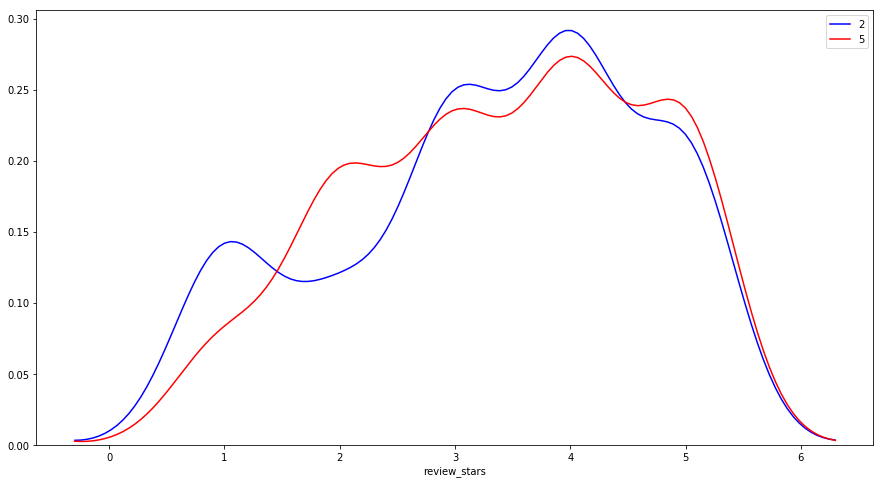

In [112]:
import seaborn as sns
plt.figure(figsize=(15,8))

sns.distplot(review_test_df[review_test_df['relevant_topic'] == 2]['review_stars'], kde=True,hist=False, color="b",label='2')
sns.distplot(review_test_df[review_test_df['relevant_topic'] == 5]['review_stars'], kde=True,hist=False, color="r",label='5')
# sns.distplot(review_test_df[review_test_df['relevant_topic'] == 2]['review_stars'], kde=True,hist=False, color="g",label='2')
# sns.distplot(review_test_df[review_test_df['relevant_topic'] == 3]['review_stars'], kde=True,hist=False, color="y",label='3')
# sns.distplot(review_test_df[review_test_df['relevant_topic'] == 4]['review_stars'], kde=True,hist=False, color="k",label='4')
# sns.distplot(review_test_df[review_test_df['relevant_topic'] == 4]['review_stars'], kde=True,hist=False, color="k",label='4')



In [101]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [135]:
lda_class.review_df['text'].iloc[6891]

"Watch out for those cashiers, they will input higher price item rather than what you ordered. They don't provide you with receipt in the first hand, until you asked them. \n\nVery bad customer service ever!"

#### Coherence Score of LDA model

In [196]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=model,
                                     texts=lda_class.processed_docs,
                                     dictionary=lda_class.dictionary,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4248645783566093


## Recommendation Engine

The idea is that once you have the topics, each document's rating gets distributed to the topic that it is the most related to
- can either give the rating to the topic that it has the most relevance to or
- use the percentages of each topic and distribute the rating to each topic

then use the topics to predict for each city what topics should be recommended


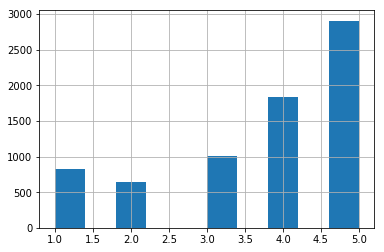

In [116]:
lda_class.review_df['review_stars'].hist()

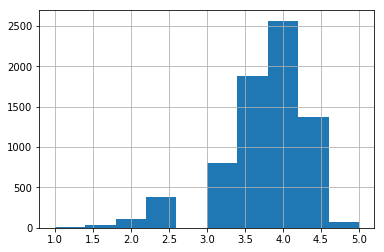

In [120]:
lda_class.review_df['business_stars'].hist()

In [198]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/miraekim/.surprise_data/ml-100k


In [208]:
lda_class.review_df[['city','relevant_topic', 'review_stars']]
# .columns
# 

,city,relevant_topic,review_stars
0,Toronto,0,4.0
1,Toronto,2,4.0
2,Toronto,3,3.0
3,Toronto,1,3.0
4,Cleveland,9,3.0
5,Madison,6,4.0
6,Madison,6,4.0
7,Mesa,6,5.0
8,Mesa,8,4.0
9,Mesa,6,3.0


In [210]:
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(lda_class.review_df[['city','relevant_topic', 'review_stars']], reader)

In [214]:
# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2305  1.2436  1.2407  1.2243  1.2325  1.2343  0.0070  
MAE (testset)     1.0022  1.0118  0.9932  1.0130  1.0064  1.0053  0.0072  
Fit time          0.37    0.34    0.34    0.36    0.36    0.35    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'fit_time': (0.37491917610168457,
  0.34038615226745605,
  0.3430900573730469,
  0.35666990280151367,
  0.3593180179595947),
 'test_mae': array([1.00220965, 1.01178366, 0.99320164, 1.01300338, 1.00640663]),
 'test_rmse': array([1.23053331, 1.24362085, 1.24065353, 1.22429042, 1.23248599]),
 'test_time': (0.009455204010009766,
  0.009872913360595703,
  0.009337902069091797,
  0.009357929229736328,
  0.010368108749389648)}

## Model Tuning

In [280]:
# supporting function
def compute_coherence_values(lda_class, corpus, dictionary, k, a, b):

    model_params = {
        'num_topics': k,
        'passes': 5,
        'workers': 10,
        'chunksize': 1000,
        'eta':b,
        'alpha':a,
        'id2word': lda_class.dictionary
    }

    model = lda_class.run_model(**model_params)
    
    coherence_model_lda = CoherenceModel(model=model,
                                         texts=lda_class.processed_docs,
                                         dictionary=lda_class.dictionary,
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [278]:
compute_coherence_values(lda_class, lda_class.bow_corpus, lda_class.dictionary, 1,1,1)

0.376286662376301

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(food_review_df[:100], test_size=0.33, random_state=42, shuffle=True)

In [ ]:
X_train

In [ ]:
df = food_review_df

filter_params = {
    'no_below': 5, # need to be in at least <no_below> documents 
    'no_above':0.4, # need to be in less than <no_above>% of documents, the lower this is, the more words it filters out
    'keep_n': 10000,
}

lda_class = lda.ldaModel(df,
            'text',
            filter_params)

In [287]:
import tqdm

# df = dim_sum_df

# filter_params = {
#     'no_below': 5, # need to be in at least <no_below> documents 
#     'no_above':0.4, # need to be in less than <no_above>% of documents, the lower this is, the more words it filters out
#     'keep_n': 10000,
# }

# lda_class = lda.ldaModel(df,
#             'text',
#             filter_params)

print('finish filtering')

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 20
step_size = 3
topics_range = range(min_topics, max_topics, step_size)
print('topic len:', len(topics_range))

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
print('alpha len:', len(alpha))

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
print('beta len:', len(beta))

# Validation sets
num_of_docs = len(df)
corpus_sets = [lda_class.bow_corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:

            # iterate through alpha values
            for a in alpha:

                # iterare through beta values
                for b in beta:
                    
                    print('starting topic_num: {} , alpha: {}, beta: {}'.format(k,a,b))
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(lda_class,
                                                  corpus=corpus_sets[i], dictionary=lda_class.dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()
                    

original dict len:  21301
after filter dict len:  6827







  0%|          | 0/270 [00:00<?, ?it/s]

finish filtering
topic len: 9
alpha len: 6
beta len: 5


KeyError: 'k'

In [6]:
results = [{'topic_num': 2 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.35193340423033187},
{'topic_num': 2 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.34767777551344003},
{'topic_num': 2 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.37279723856918834},
{'topic_num': 2 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.360157488592503},
{'topic_num': 2 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.32972192447598864},
{'topic_num': 2 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.3800867477558727},
{'topic_num': 2 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.3384230289738539},
{'topic_num': 2 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.3497019648586176},
{'topic_num': 2 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.3508130568894676},
{'topic_num': 2 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.3908984415718727},
{'topic_num': 2 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.3432118833319514},
{'topic_num': 2 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.3307059075135105},
{'topic_num': 2 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.3733579916854361},
{'topic_num': 2 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.3449533447263437},
{'topic_num': 2 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.35980449429241},
{'topic_num': 2 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.356574250407633},
{'topic_num': 2 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.3371393386023156},
{'topic_num': 2 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.3303486247068137},
{'topic_num': 2 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.3566945983670682},
{'topic_num': 2 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.34129038046499127},
{'topic_num': 2 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.3386213727959767},
{'topic_num': 2 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.3755600553573682},
{'topic_num': 2 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.3737117468659872},
{'topic_num': 2 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.3517507767535001},
{'topic_num': 2 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.34385650380457256},
{'topic_num': 2 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.38630700809128127},
{'topic_num': 2 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.36783674515443643},
{'topic_num': 2 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.3435749897671312},
{'topic_num': 2 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.36687025087774083},
{'topic_num': 2 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.3894696295911244},
{'topic_num': 4 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.35938376642921577},
{'topic_num': 4 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.38279737227962224},
{'topic_num': 4 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.38143964327233537},
{'topic_num': 4 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.3930175512205827},
{'topic_num': 4 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.38143531333037806},
{'topic_num': 4 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.397427410796759},
{'topic_num': 4 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.4061857597020651},
{'topic_num': 4 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.39732787623187693},
{'topic_num': 4 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.4107520980573175},
{'topic_num': 4 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.39597959979325603},
{'topic_num': 4 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.3749019678880907},
{'topic_num': 4 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.40192951058820797},
{'topic_num': 4 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.392868763772551},
{'topic_num': 4 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.36387486591141016},
{'topic_num': 4 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.409546018238994},
{'topic_num': 4 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.37528801432470255},
{'topic_num': 4 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.40527743020354867},
{'topic_num': 4 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.37351282070127273},
{'topic_num': 4 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.3933350553847812},
{'topic_num': 4 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.37724347216188286},
{'topic_num': 4 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.3821128409286824},
{'topic_num': 4 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.4078696630337694},
{'topic_num': 4 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.392270684975588},
{'topic_num': 4 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.41139204543201907},
{'topic_num': 4 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.39554037401669206},
{'topic_num': 4 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.43234839788917534},
{'topic_num': 4 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.4005375341250355},
{'topic_num': 4 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.41197275464452127},
{'topic_num': 4 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.43554031101665736},
{'topic_num': 4 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.42335811603664164},
{'topic_num': 6 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.42600187879996926},
{'topic_num': 6 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.40404706321966355},
{'topic_num': 6 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.42464852166416583},
{'topic_num': 6 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.37006128532987353},
{'topic_num': 6 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.3961413355816216},
{'topic_num': 6 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.4096194529111274},
{'topic_num': 6 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.3948109675503491},
{'topic_num': 6 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.40653806427431877},
{'topic_num': 6 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.3908298906248812},
{'topic_num': 6 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.4014136309448186},
{'topic_num': 6 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.40833837283102553},
{'topic_num': 6 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.4143137016572866},
{'topic_num': 6 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.3889685446490699},
{'topic_num': 6 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.41204946412039933},
{'topic_num': 6 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.4103102431270023},
{'topic_num': 6 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.40677182971102505},
{'topic_num': 6 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.4037761417305783},
{'topic_num': 6 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.36839606624381793},
{'topic_num': 6 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.39206377701398526},
{'topic_num': 6 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.4089368542079082},
{'topic_num': 6 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.4192571460279006},
{'topic_num': 6 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.4323304492232818},
{'topic_num': 6 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.3905465934368453},
{'topic_num': 6 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.4207635524261469},
{'topic_num': 6 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.42450668578131195},
{'topic_num': 6 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.43739219372143495},
{'topic_num': 6 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.44236767769266155},
{'topic_num': 6 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.39009005587135764},
{'topic_num': 6 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.4019506665706487},
{'topic_num': 6 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.4144996162726209},
{'topic_num': 8 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.4092096070722872},
{'topic_num': 8 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.4100570845357189},
{'topic_num': 8 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.41455854673225934},
{'topic_num': 8 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.3724496791124169},
{'topic_num': 8 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.40827856084140113},
{'topic_num': 8 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.39721554619303123},
{'topic_num': 8 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.4285503382142538},
{'topic_num': 8 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.3949402433731986},
{'topic_num': 8 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.3923411569168914},
{'topic_num': 8 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.41236295609379553},
{'topic_num': 8 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.40757183333327895},
{'topic_num': 8 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.4121662516734613},
{'topic_num': 8 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.42542662401030784},
{'topic_num': 8 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.41994630079034867},
{'topic_num': 8 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.4054371565641363},
{'topic_num': 8 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.40010365167481443},
{'topic_num': 8 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.3907244247899997},
{'topic_num': 8 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.4009502219755442},
{'topic_num': 8 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.3705372216474834},
{'topic_num': 8 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.40060233240852344},
{'topic_num': 8 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.4221773853953159},
{'topic_num': 8 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.4024459573119893},
{'topic_num': 8 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.4167712953239721},
{'topic_num': 8 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.3948569460411494},
{'topic_num': 8 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.4161316015097407},
{'topic_num': 8 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.3936477407766332},
{'topic_num': 8 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.40307643664741927},
{'topic_num': 8 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.4095029547878873},
{'topic_num': 8 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.3993826934644802},
{'topic_num': 8 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.421899930036901},
{'topic_num': 10 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.4097386158053967},
{'topic_num': 10 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.39026002239043023},
{'topic_num': 10 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.4150795077424222},
{'topic_num': 10 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.39659469398782915},
{'topic_num': 10 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.38090510186503973},
{'topic_num': 10 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.41535537658989086},
{'topic_num': 10 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.4263105984876162},
{'topic_num': 10 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.4006493678496839},
{'topic_num': 10 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.4242315908750898},
{'topic_num': 10 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.39977325388758056},
{'topic_num': 10 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.39360306935159334},
{'topic_num': 10 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.39857788413684353},
{'topic_num': 10 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.39732057661298387},
{'topic_num': 10 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.40384857966006543},
{'topic_num': 10 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.3891277323306098},
{'topic_num': 10 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.3950636394241044},
{'topic_num': 10 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.3862749792389466},
{'topic_num': 10 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.3944002611235062},
{'topic_num': 10 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.3931974294305538},
{'topic_num': 10 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.40119488799365577},
{'topic_num': 10 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.41426133571145785},
{'topic_num': 10 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.4020542151979597},
{'topic_num': 10 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.4167872028995803},
{'topic_num': 10 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.41133116767352834},
{'topic_num': 10 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.41593454716774136},
{'topic_num': 10 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.40286644369825797},
{'topic_num': 10 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.40486820459325285},
{'topic_num': 10 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.4051997663542388},
{'topic_num': 10 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.427237443898406},
{'topic_num': 10 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.3898123093346019},
{'topic_num': 12 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.4130713696685402},
{'topic_num': 12 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.39285112378795845},
{'topic_num': 12 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.39489190894456966},
{'topic_num': 12 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.4034411845992309},
{'topic_num': 12 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.4049544827815205},
{'topic_num': 12 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.4014849460700916},
{'topic_num': 12 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.4118414510319177},
{'topic_num': 12 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.4064520976026406},
{'topic_num': 12 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.41452066775863977},
{'topic_num': 12 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.4151343643049507},
{'topic_num': 12 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.38160095036379055},
{'topic_num': 12 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.39098460879259217},
{'topic_num': 12 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.39422345629452044},
{'topic_num': 12 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.3933008118682255},
{'topic_num': 12 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.4072767768237036},
{'topic_num': 12 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.4011821767209895},
{'topic_num': 12 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.37719019328342535},
{'topic_num': 12 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.39431557229821196},
{'topic_num': 12 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.380042351963686},
{'topic_num': 12 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.3750702624442234},
{'topic_num': 12 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.4122163609964841},
{'topic_num': 12 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.4016129061644063},
{'topic_num': 12 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.40014318543897304},
{'topic_num': 12 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.3960192063748111},
{'topic_num': 12 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.4081666269185666},
{'topic_num': 12 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.41343861838376345},
{'topic_num': 12 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.38852697266994335},
{'topic_num': 12 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.4158604442602322},
{'topic_num': 12 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.4061314020868633},
{'topic_num': 12 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.3988082473598547},
{'topic_num': 14 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.3997563300869805},
{'topic_num': 14 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.3774344078724221},
{'topic_num': 14 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.38581069949851127},
{'topic_num': 14 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.4373757463251843},
{'topic_num': 14 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.41458198056507645},
{'topic_num': 14 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.42295858276314263},
{'topic_num': 14 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.41207610017664564},
{'topic_num': 14 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.4111865324364406},
{'topic_num': 14 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.3930655399844533},
{'topic_num': 14 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.40486676522174125},
{'topic_num': 14 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.4008116242537264},
{'topic_num': 14 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.3995063353102653},
{'topic_num': 14 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.40247154642190086},
{'topic_num': 14 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.3833392360153244},
{'topic_num': 14 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.39359467906006324},
{'topic_num': 14 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.38727762693327705},
{'topic_num': 14 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.3758606121374752},
{'topic_num': 14 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.37929995097968633},
{'topic_num': 14 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.37591024279088875},
{'topic_num': 14 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.3840924435351511},
{'topic_num': 14 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.3875894987797913},
{'topic_num': 14 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.39666257585999737},
{'topic_num': 14 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.3998468368367993},
{'topic_num': 14 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.3948827554957863},
{'topic_num': 14 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.40507824626320443},
{'topic_num': 14 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.41285256619557215},
{'topic_num': 14 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.4187399357545903},
{'topic_num': 14 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.39972315949297005},
{'topic_num': 14 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.43979523518883173},
{'topic_num': 14 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.39571139874096284},
{'topic_num': 16 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.3945350827706541},
{'topic_num': 16 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.4035282947421641},
{'topic_num': 16 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.40589879840065435},
{'topic_num': 16 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.39887910508470914},
{'topic_num': 16 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.39302686639694906},
{'topic_num': 16 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.3963883621777132},
{'topic_num': 16 , 'alpha': 0.31, 'beta': 0.31, 'coherence': 0.4128488717768881},
{'topic_num': 16 , 'alpha': 0.31, 'beta': 0.61, 'coherence': 0.41821848187598865},
{'topic_num': 16 , 'alpha': 0.31, 'beta': 0.9099999999999999, 'coherence': 0.41523712733498674},
{'topic_num': 16 , 'alpha': 0.31, 'beta': 'symmetric', 'coherence': 0.41752535043052363},
{'topic_num': 16 , 'alpha': 0.61, 'beta': 0.01, 'coherence': 0.3983601401563399},
{'topic_num': 16 , 'alpha': 0.61, 'beta': 0.31, 'coherence': 0.39861781775984606},
{'topic_num': 16 , 'alpha': 0.61, 'beta': 0.61, 'coherence': 0.39425332034694893},
{'topic_num': 16 , 'alpha': 0.61, 'beta': 0.9099999999999999, 'coherence': 0.39164885102269015},
{'topic_num': 16 , 'alpha': 0.61, 'beta': 'symmetric', 'coherence': 0.4030038415956506},
{'topic_num': 16 , 'alpha': 0.9099999999999999, 'beta': 0.01, 'coherence': 0.38100922119226854},
{'topic_num': 16 , 'alpha': 0.9099999999999999, 'beta': 0.31, 'coherence': 0.39504602034898695},
{'topic_num': 16 , 'alpha': 0.9099999999999999, 'beta': 0.61, 'coherence': 0.3769645361021803},
{'topic_num': 16 , 'alpha': 0.9099999999999999, 'beta': 0.9099999999999999, 'coherence': 0.38120076779646306},
{'topic_num': 16 , 'alpha': 0.9099999999999999, 'beta': 'symmetric', 'coherence': 0.37227810750542273},
{'topic_num': 16 , 'alpha': 'symmetric', 'beta': 0.01, 'coherence': 0.4045374878492348},
{'topic_num': 16 , 'alpha': 'symmetric', 'beta': 0.31, 'coherence': 0.41209112882284393},
{'topic_num': 16 , 'alpha': 'symmetric', 'beta': 0.61, 'coherence': 0.39763371560045047},
{'topic_num': 16 , 'alpha': 'symmetric', 'beta': 0.9099999999999999, 'coherence': 0.4094878646380267},
{'topic_num': 16 , 'alpha': 'symmetric', 'beta': 'symmetric', 'coherence': 0.40990988244323723},
{'topic_num': 16 , 'alpha': 'asymmetric', 'beta': 0.01, 'coherence': 0.4089333082111405},
{'topic_num': 16 , 'alpha': 'asymmetric', 'beta': 0.31, 'coherence': 0.39882025495068907},
{'topic_num': 16 , 'alpha': 'asymmetric', 'beta': 0.61, 'coherence': 0.4134688598937043},
{'topic_num': 16 , 'alpha': 'asymmetric', 'beta': 0.9099999999999999, 'coherence': 0.42784595452926216},
{'topic_num': 16 , 'alpha': 'asymmetric', 'beta': 'symmetric', 'coherence': 0.4344887019566571},
{'topic_num': 18 , 'alpha': 0.01, 'beta': 0.01, 'coherence': 0.41756668079859877},
{'topic_num': 18 , 'alpha': 0.01, 'beta': 0.31, 'coherence': 0.4306141240331556},
{'topic_num': 18 , 'alpha': 0.01, 'beta': 0.61, 'coherence': 0.43905330860281055},
{'topic_num': 18 , 'alpha': 0.01, 'beta': 0.9099999999999999, 'coherence': 0.3936749091892979},
{'topic_num': 18 , 'alpha': 0.01, 'beta': 'symmetric', 'coherence': 0.391525478902653},
{'topic_num': 18 , 'alpha': 0.31, 'beta': 0.01, 'coherence': 0.41633357368402435}]

In [7]:
result_df = pd.DataFrame(results)

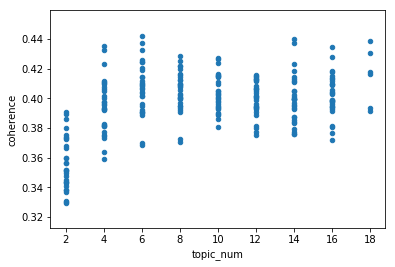

In [10]:
result_df.plot.scatter(x='topic_num',y='coherence')

In [17]:
import numpy as np

# result_df.groupby('alpha').agg({'coherence': [np.mean, np.var]})
# .plot.scatter(x='topic_num',y='coherence')
# result_df.plot.scatter(x='alpha',y='coherence')

coherence          
                        mean       var
alpha                                 
0.01                0.395130  0.000540
0.31                0.402017  0.000372
0.61                0.392879  0.000424
0.9099999999999999  0.382411  0.000349
asymmetric          0.406869  0.000428
symmetric           0.400218  0.000421

In [18]:
result_df.sort_values('coherence', ascending=False)

,alpha,beta,coherence,topic_num
86,asymmetric,0.31,0.442368,6
208,asymmetric,0.91,0.439795,14
242,0.01,0.61,0.439053,18
85,asymmetric,0.01,0.437392,6
183,0.01,0.91,0.437376,14
58,asymmetric,0.91,0.435540,4
239,asymmetric,symmetric,0.434489,16
55,asymmetric,0.01,0.432348,4
81,symmetric,0.31,0.432330,6
241,0.01,0.31,0.430614,18


In [9]:
food_review_sample_df = food_review_df.sample(frac=0.05)

In [10]:
len(food_review_sample_df)

236384

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(food_review_sample_df, test_size=0.2, random_state=42, shuffle=True)

In [12]:
import utils.preprocessing as prep
import utils.ldamodel as lda
import imp
imp.reload(lda)

<module 'utils.ldamodel' from '/Users/miraekim/workspace/coursework/persproj/utils/ldamodel.py'>

In [13]:
df = X_train

filter_params = {
    'no_below': 5, # need to be in at least <no_below> documents 
    'no_above':0.4, # need to be in less than <no_above>% of documents, the lower this is, the more words it filters out
    # 'keep_n': 20000,
}

lda_class = lda.ldaModel(df,
            'text',
            filter_params)

/Users/miraekim/workspace/coursework/persproj/utils/ldamodel.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  review_df[review_text_field] = review_df[review_text_field].fillna('')


original dict len:  66735
after filter dict len:  19027


In [15]:
# result of fine tuning 
model_params = {
        'num_topics': 6,
        'passes': 5,
        'workers': 10,
        'chunksize': 5000,
        'eta':0.31,
        'alpha':'asymmetric',
        'id2word': lda_class.dictionary
    }

model = lda_class.run_model(**model_params)

from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=model,
                                         texts=lda_class.processed_docs,
                                         dictionary=lda_class.dictionary,
                                         coherence='c_v')

In [16]:
coherence_model_lda.get_coherence()

0.40695563565804366

In [20]:
model.print_topics()

[(0,
  '0.025*"good" + 0.024*"great" + 0.016*"servic" + 0.013*"come" + 0.012*"time" + 0.011*"love" + 0.011*"friend" + 0.011*"order" + 0.010*"like" + 0.009*"best"'),
 (1,
  '0.017*"order" + 0.016*"time" + 0.015*"good" + 0.014*"come" + 0.012*"servic" + 0.011*"wait" + 0.010*"like" + 0.007*"go" + 0.006*"tast" + 0.006*"chicken"'),
 (2,
  '0.020*"great" + 0.015*"pizza" + 0.014*"good" + 0.011*"beer" + 0.010*"drink" + 0.010*"like" + 0.009*"time" + 0.009*"friend" + 0.008*"come" + 0.007*"nice"'),
 (3,
  '0.011*"like" + 0.011*"burger" + 0.008*"good" + 0.008*"room" + 0.007*"go" + 0.007*"time" + 0.007*"look" + 0.006*"come" + 0.006*"nice" + 0.005*"great"'),
 (4,
  '0.014*"good" + 0.011*"like" + 0.009*"chicken" + 0.009*"order" + 0.008*"dish" + 0.007*"restaur" + 0.007*"sauc" + 0.007*"tast" + 0.007*"salad" + 0.007*"come"'),
 (5,
  '0.023*"order" + 0.014*"time" + 0.012*"come" + 0.012*"servic" + 0.010*"go" + 0.010*"wait" + 0.010*"tabl" + 0.010*"like" + 0.009*"minut" + 0.009*"say"')]

In [ ]:
model.get_document_topics()

In [17]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(model, lda_class.bow_corpus, lda_class.dictionary)

LDAvis_prepared

KeyboardInterrupt: 